In [1]:
using LinearAlgebra
using Images # read and show images, more info here: https://github.com/JuliaImages/Images.jl
using JLD # used for File I/O, more info here: https://github.com/JuliaIO/JLD.jl
using Plots

[ Info: Precompiling JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8]
ERROR: LoadError: HDF5 is not properly installed. Please run Pkg.build("HDF5") and restart Julia.
Stacktrace:
 [1] error(::String, ::String)
   @ Base .\error.jl:42
 [2] top-level scope
   @ ~\.julia\packages\HDF5\LW5kO\src\HDF5.jl:45
 [3] include
   @ .\Base.jl:386 [inlined]
 [4] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt64}}, source::String)
   @ Base .\loading.jl:1213
 [5] top-level scope
   @ none:1
 [6] eval
   @ .\boot.jl:360 [inlined]
 [7] eval(x::Expr)
   @ Base.MainInclude .\client.jl:446
 [8] top-level scope
   @ none:1
in expression starting at C:\Users\jarpa\.julia\packages\HDF5\LW5kO\src\HDF5.jl:1
ERROR: LoadError: Failed to precompile HDF5 [f67ccb44-e63f-5c2f-98bd-6dc0ccc4ba2f] to C:\Users\jarpa\.julia\compiled\v1.6\HDF5\jl_A6A8.tmp.
Stacktrace:
  [1] error(s::String

LoadError: Failed to precompile JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8] to C:\Users\jarpa\.julia\compiled\v1.6\JLD\jl_A3CA.tmp.

In [13]:
A=randn(3,10) #10 pontos em R3

3×10 Matrix{Float64}:
 -0.183541  -1.47224   0.612252  …  -1.19928   -0.142333  -1.68766
  0.518829  -1.27168   1.22847      -0.622314   0.185663   1.74659
 -0.784529  -0.44924  -1.03227      -0.86998    1.2607    -0.799625

In [28]:
C=A*A' # Matriz de Correlação, Martriz de covariância, matrix de gram

3×3 Matrix{Float64}:
 17.0296   6.02774  -3.67014
  6.02774  7.68463   2.14621
 -3.67014  2.14621   8.23024

In [29]:
function potência(C)
    n,m=size(C)
    v=randn(n,1) # chuta um vetor aleatório não-nulo
    for i=1:100
        v=C*v
        v=v/norm(v)
    end
    return v, only(v'*C*v)
end

potência (generic function with 1 method)

In [30]:
A=randn(3,10)
v1,λ1=potência(C)
λ1

20.467004973560076

In [34]:
norm(C*v1-λ1*v1)

0.0

In [31]:
eigen(C)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
  2.439021149578764
 10.038475201586008
 20.46700497356008
vectors:
3×3 Matrix{Float64}:
  0.433722  -0.0664467   0.898593
 -0.720027   0.574002    0.389979
  0.541707   0.816154   -0.201114

In [22]:
v1

3×1 Matrix{Float64}:
 -0.763141578638173
  0.30178561196536374
 -0.5714371140942178

In [23]:
norm(C*v1-λ1*v1)

0.0

In [24]:
eigen(C)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
  5.455457809085167
  7.289921843149487
 14.824755312501633
vectors:
3×3 Matrix{Float64}:
 -0.394303   0.511996   0.763142
  0.483133   0.821893  -0.301786
  0.781734  -0.249704   0.571437

In [59]:
A=randn(3,10)
C=A*A'
autovalores, autovetores=eigen(C)
#autovalores,=eigen(C)
v1,λ1=potência(C)
print("Autovalor ",λ1, "\n")
print("Erro ",norm(C*v1-λ1*v1), "\n")
C=C-λ1*(v1*v1')
v2,λ2=potência(C)
print("Autovalor ",λ2, "\n")
print("Erro ",norm(C*v2-λ2*v2), "\n")
C=C-λ2*(v2*v2')
v3,λ3=potência(C)
print("Autovalor ",λ3, "\n")
print("Erro ",norm(C*v3-λ3*v3), "\n")
C=C-λ3*(v3*v3')
#norm(C) #norma de Frobenius
C

Autovalor 21.054623796660053
Erro 4.351167857633658e-15
Autovalor 10.722184373263971
Erro 2.098253533154959e-10
Autovalor 8.50166250659351
Erro 9.930136612989092e-16


3×3 Matrix{Float64}:
  1.44329e-15  -2.88658e-15   3.10862e-15
 -2.88658e-15  -4.44089e-16  -1.33227e-15
  3.10862e-15  -1.33227e-15   2.66454e-15

In [60]:
autovalores

3-element Vector{Float64}:
  8.501662506593505
 10.72218437326397
 21.05462379666003

In [61]:
v1'*v2

1×1 Matrix{Float64}:
 1.04600276274384e-16

In [62]:
v2'*v3

1×1 Matrix{Float64}:
 2.4680471907611235e-11

In [63]:
v3'*v1

1×1 Matrix{Float64}:
 -1.1955388399562735e-17

In [40]:
norm(C*v1-λ1*v1)

 

9.28080364653382

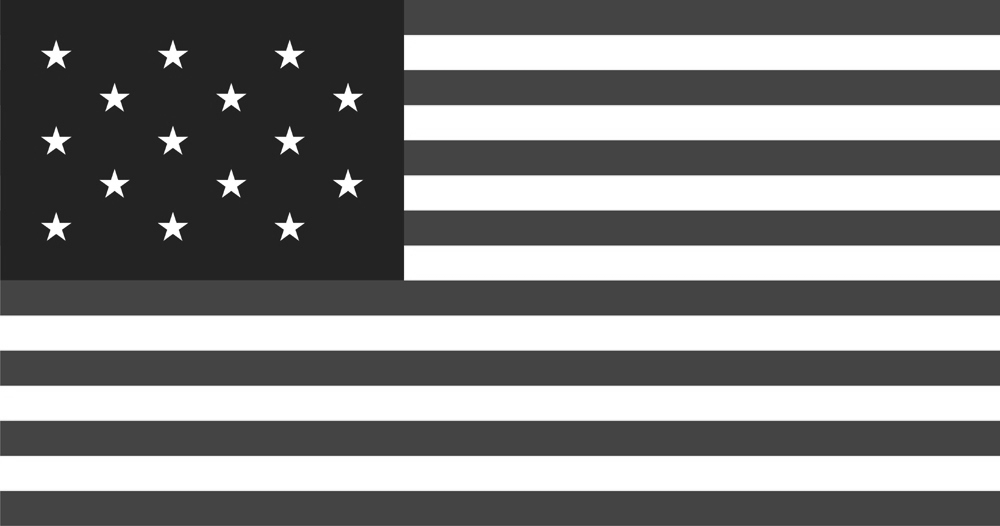

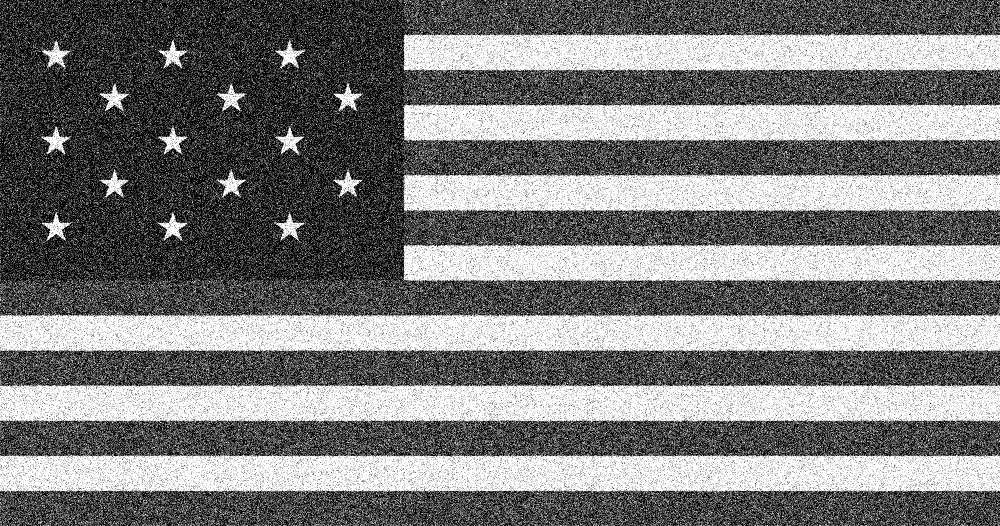

In [68]:
img = load("bandeira.jpg");
#display(Gray.([2*img 1.5*img img]))
display(Gray.(img))
#Get image as a raw matrix
bandeira = channelview(Gray.(img[:,:]));
bandeira_ruidosa=bandeira+*randn(526,1000)
display(Gray.(bandeira_ruidosa))

In [79]:
A=(bandeira_ruidosa)
C=A*A'
v1,λ1=potência(C)
print("Autovalor ",λ1, "\n")
#p1=A'*v1
#display(Gray.(v1*p1'))
C=C-λ1*(v1*v1')
#################################################
#v2,λ2=potência(C)
#print("Autovalor ",λ2, "\n")
#p2=A'*v2
#display(Gray.(v1*p1'+v2*p2'))
#C=C-λ2*(v2*v2')
#################################################
#v3,λ3=potência(C)
print("Autovalor ",λ3, "\n")
#C=C-λ3*(v3*v3')
print("Autovalor ",λ1, "\n")
#p3=A'*v3

#display(Gray.(v1*p1'+v2*p2'+v3*p3'))


Autovalor 191754.60187457557
Autovalor 1204.9698678034222
Autovalor 191754.60187457557


In [80]:
size(A)

(526, 1000)

In [81]:
size(v1)

(526, 1)

In [82]:
size((A'*v1)')

(1, 1000)

1×1000 adjoint(::Matrix{Float64}) with eltype Float64:
 10.3918  9.11608  9.41565  9.44718  …  15.9095  16.3933  16.1136  16.426

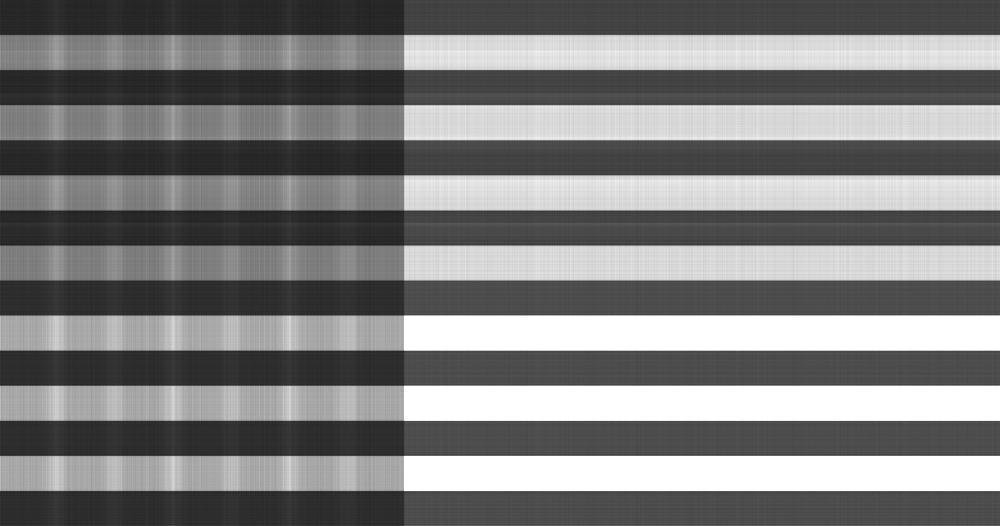

In [87]:
p1=(A'*v1)'
melhor_matriz_de_posto1=v1*p1
display(Gray.(melhor_matriz_de_posto1)) 

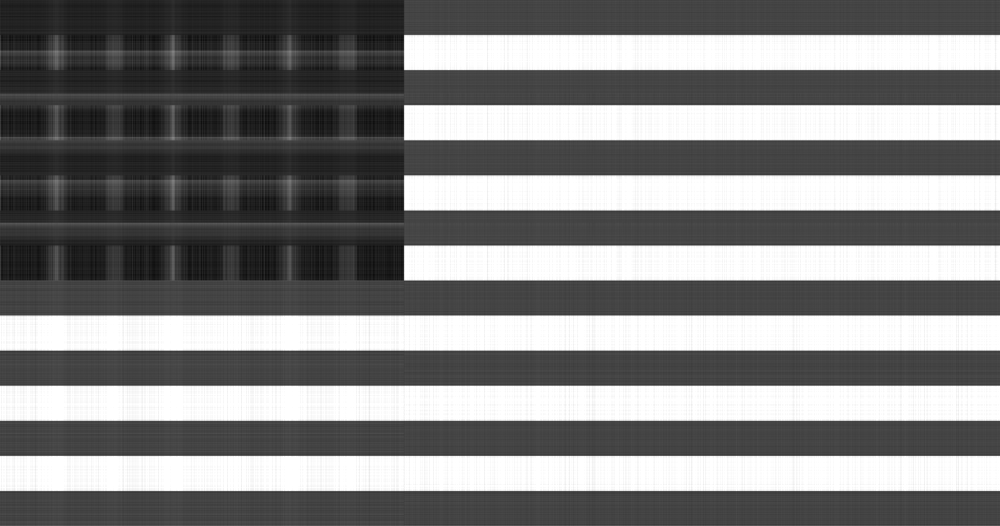

In [88]:
p2=(A'*v2)'
melhor_matriz_de_posto2=v1*p1+v2*p2
display(Gray.(melhor_matriz_de_posto2)) 

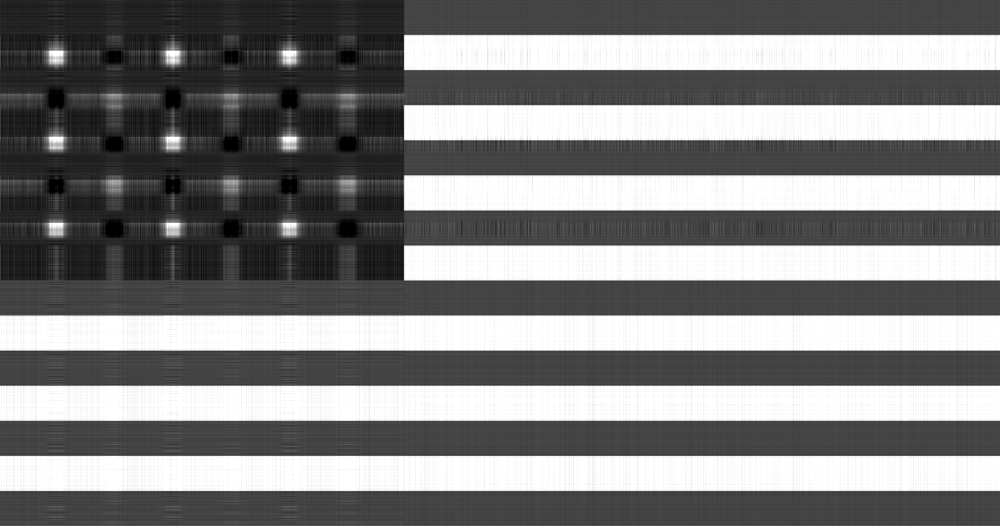

In [90]:
p3=(A'*v3)'
melhor_matriz_de_posto3=v1*p1+v2*p2+v3*p3
display(Gray.(melhor_matriz_de_posto3)) 

In [ ]:
p3=(A'*v3)'
melhor_matriz_de_posto3=v1*p1+v2*p2+v3*p3
display(Gray.(melhor_matriz_de_posto3)) 

In [ ]:
melhor_matriz_de_posto=v1*p1
display(Gray.(melhor_matriz_de_posto)) 

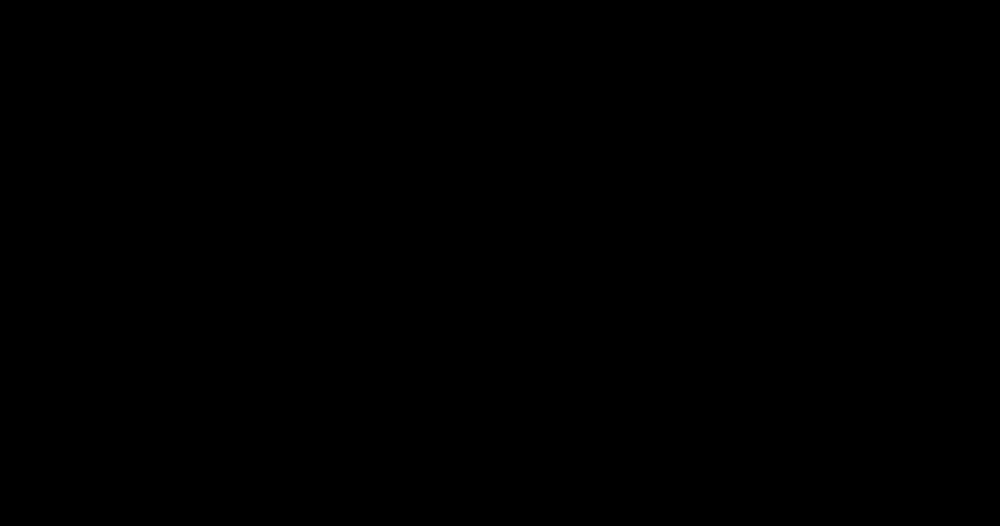

In [12]:
display(Gray.(v1*-10*ones(1,1000))) 
